# 运动模糊

In [235]:
import numpy as np 
from matplotlib import pyplot as plt  

In [236]:
def color_normalize(img):
    _img = np.abs(img)
    mmax = np.max(_img)
    mmin = np.min(_img)
    mrange = mmax - mmin
    h,w = img.shape 
    normialized_img = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            normialized_img[i][j] = 255 * ((_img[i][j] - mmin) / mrange)
    return normialized_img


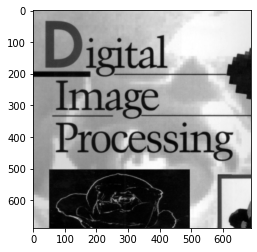

In [237]:
"加载图片"
f = plt.imread("./../images/book-cover.tif")
plt.imshow(f, cmap="gray")

## 运动模糊
假设图像$ f(x,y) $做平面运动,$ x_{0}(t) $和$ y_{0}(t) $分别是x和y方向上的时变分量，如果T是曝光时间，则有
$$
    g(x,y) = \int_0^T f[x-x_0(t),y-y_0(t)]dt
$$

## 运动模糊频率域的退化方程
$$
    H(u,v) = \dfrac{T}{\pi(ua+vb)}sin[\pi(ua + vb)]e^{-j\pi(ua+vb)}
$$ 

式中a,b分别表示xy方向上的平移距离，T表示周期。

In [238]:
"""
h  图片的高度
w  图片的宽度
a  x分量的位移
b  y分量的位移
T  周期
"""
def create_frq_sport_blur_factor(h,w,a,b,T):
    H = np.zeros((h,w) ,dtype="complex")
    for v in range(h):
        for u in range(w):
            temp = np.pi * ((u - p) * a + (v - q) * b)
            if temp == 0 :
                H[u,v] = T
            else :
                H[u,v] = T * np.sin(temp) * np.exp(-1j *(temp)) /  (temp)
    return H

In [239]:
"""
图像中心化
"""
def img_cretralization(img):
    h,w = img.shape
    for y in range(h):
        for x in range(w):
            img[x][y] = img[x][y] * (-1) ** (x+y)



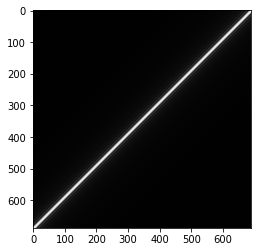

In [240]:
f = f.copy()
img_cretralization(f)
h,w = f.shape
p = h / 2 +  1 
q = w / 2 + 1
H = create_frq_sport_blur_factor(h , w ,0.1,0.1,1)
plt.imshow(color_normalize(H) , 'gray')

In [241]:
F = np.fft.fft2(f)


In [242]:
G = F * H

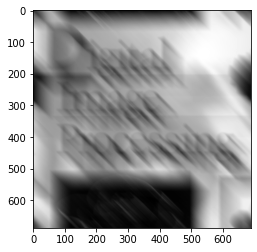

In [243]:
g =np.real(np.fft.ifft2(G))
img_cretralization(g)
# g = color_normalize(g)
plt.imshow(g ,cmap="gray")

## 逆滤波
$$
    F(u,v) = G(u,v) / H(u,v) 
$$

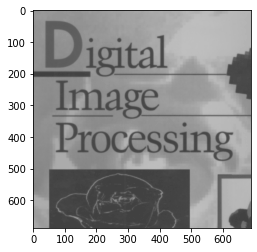

In [244]:
F = G / H 
f = np.real(np.fft.ifft2(F))
img_cretralization(f)

plt.imshow(f ,cmap="gray")